In [1]:
# Load library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Load Data
df_store = pd.read_csv("C:/Users/ho.phuongdt/Desktop/sales dataset/stores data-set.csv")
df_feature = pd.read_csv("C:/Users/ho.phuongdt/Desktop/sales dataset/Features data set.csv",parse_dates=["Date"])
df_sales = pd.read_csv("C:/Users/ho.phuongdt/Desktop/sales dataset/sales data-set.csv",parse_dates=["Date"])

In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [4]:
# Exploring Data
data_date = df_feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)

data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

In [5]:
print(data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000   143.000000  143.000000  143.000000    143.000000
mean      46.601399    60.663782    3.358607  171.578394      7.999151
std        5.399713    15.172792    0.429401    3.100148      0.483853
min       39.000000    30.480889    2.672067  167.546485      6.953711
25%       44.000000    47.720222    2.885367  168.408144      7.508333
50%       46.000000    61.051111    3.488644  171.386189      8.150133
75%       47.000000    74.697333    3.726133  174.724576      8.428578
max       80.000000    82.176444    3.997778  176.652613      8.619311


<AxesSubplot:title={'center':'Unemployment'}, xlabel='Date'>

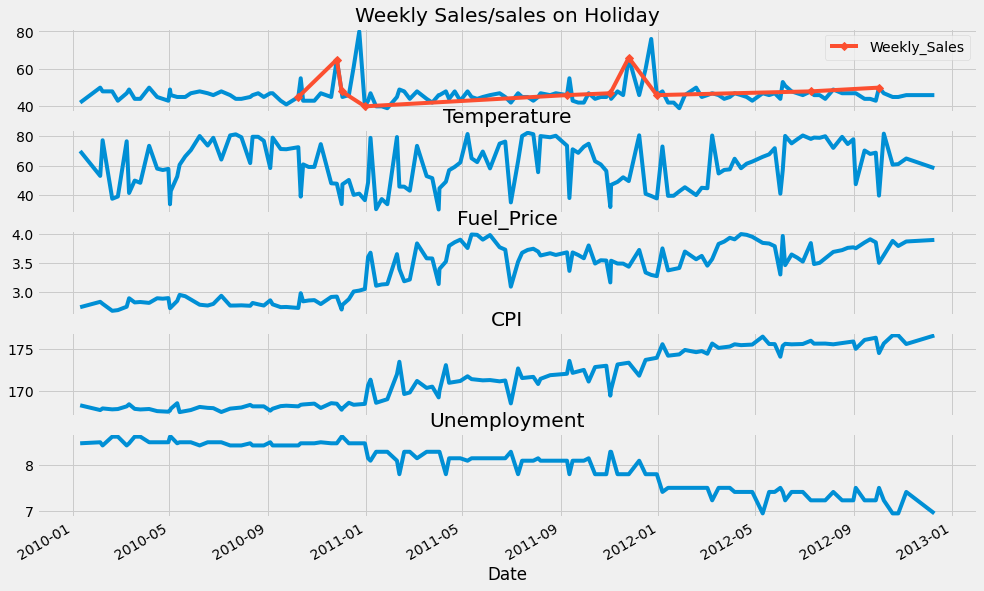

In [6]:
# Visualization
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

<AxesSubplot:>

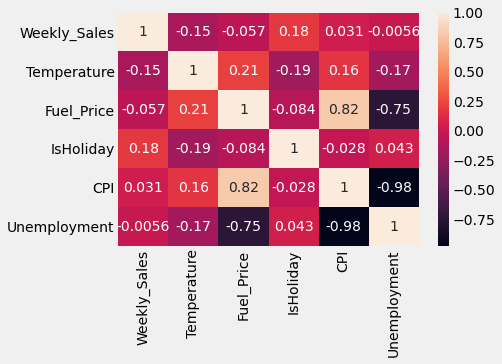

In [7]:
sns.heatmap(data.corr(),annot=True)

In [8]:
#Weekly sales doesnot show any high correlation with any other parameters.
#CPI and Unemployment shows negative correlation on other hand Fuel Price show positive correlation
#Unemployment and Fuel price are also negatively correlated

Text(0, 0.5, 'Sales')

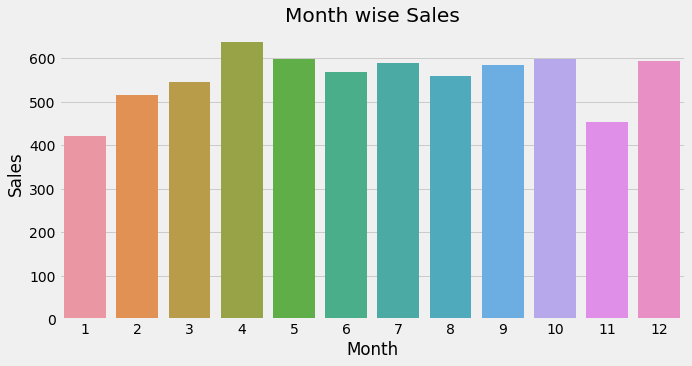

In [9]:
data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

In [10]:
#It could be as Enough buying during offer and holidays (Black friday Sales,Chrismas,New year) and later sales go down and then again gaining momentum in some months.
#In Nov also people show less buying can be waiting period for upcoming sales.

Text(0, 0.5, 'Sales')

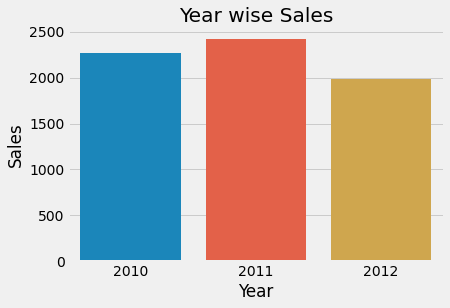

In [11]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})

sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Weekly_Sales"], period=45) 

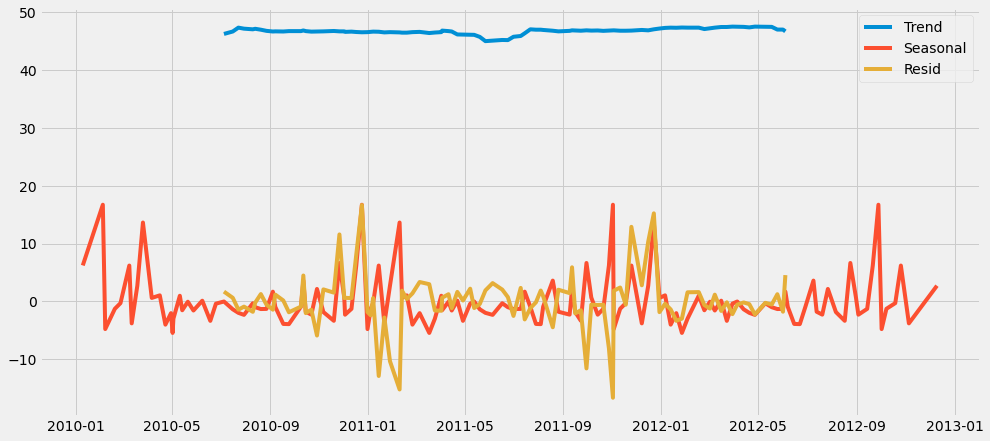

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(["Trend", "Seasonal","Resid"], loc ="upper right") 

In [14]:
# Analysis Storewise
data_Store = df_feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})

temp_store = df_sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
df_store["temp"] = data_Store.Temperature
df_store["Fuel_Price"] = data_Store.Fuel_Price
df_store["holiday"] = data_Store.IsHoliday
df_store["Weekly_Sales"] = temp_store.Weekly_Sales

In [15]:
df_store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


C:\Users\ho.phuongdt\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

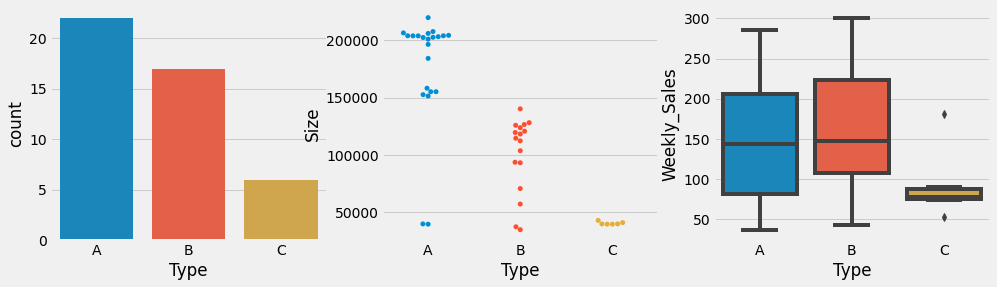

In [16]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(df_store.Type,ax=ax[0])
sns.swarmplot(data = df_store,y="Size",x="Type",ax=ax[1])

sns.boxplot(data = df_store,y="Weekly_Sales",x="Type",ax=ax[2])

Text(0.5, 0, 'Department')

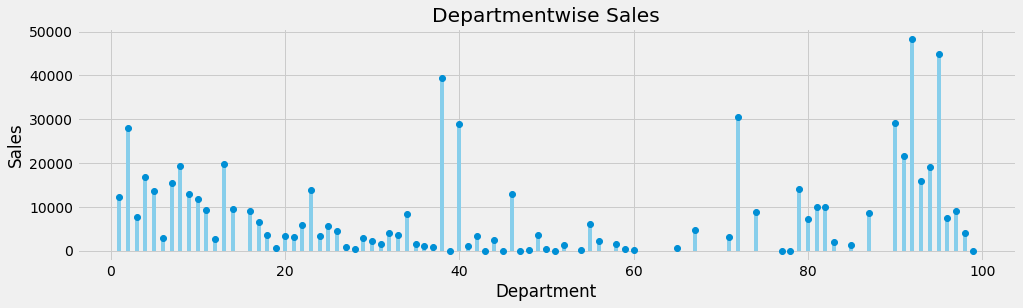

In [17]:
# Analysis Departmentwise
data_Dept = df_sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

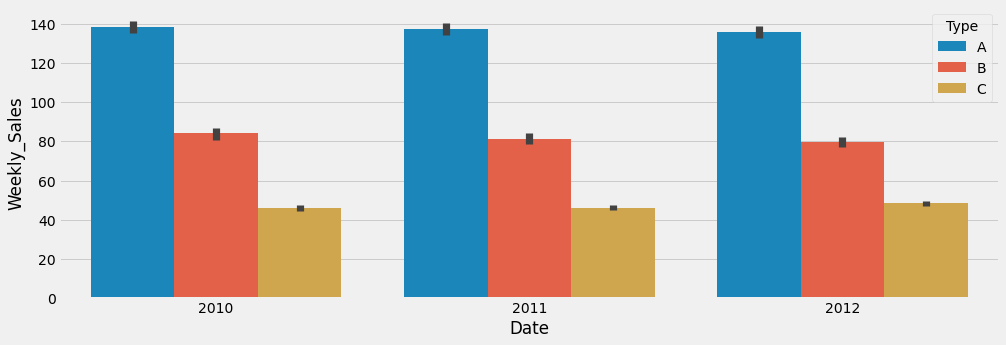

In [18]:
# Analysis Store Type and Year Wise
sales_date_store = df_sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(df_feature,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,df_store[["Store","Type"]] ,  how='left', on=["Store"])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

Text(0.5, 0, 'Date')

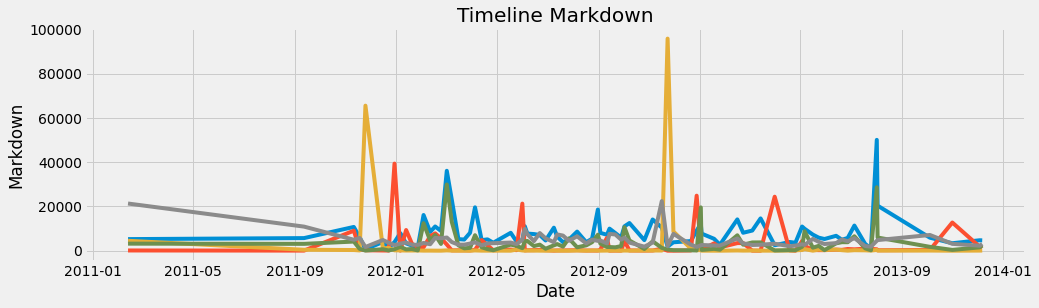

In [19]:
# Analysis of MarkDown
plt.figure(figsize=(15,4))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})


plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index,train_markdown.MarkDown2)
plt.plot(train_markdown.index,train_markdown.MarkDown3)
plt.plot(train_markdown.index,train_markdown.MarkDown4)
plt.plot(train_markdown.index,train_markdown.MarkDown5)
plt.title("Timeline Markdown")
plt.ylabel("Markdown")
plt.xlabel("Date")

Text(0, 0.5, 'Markdown')

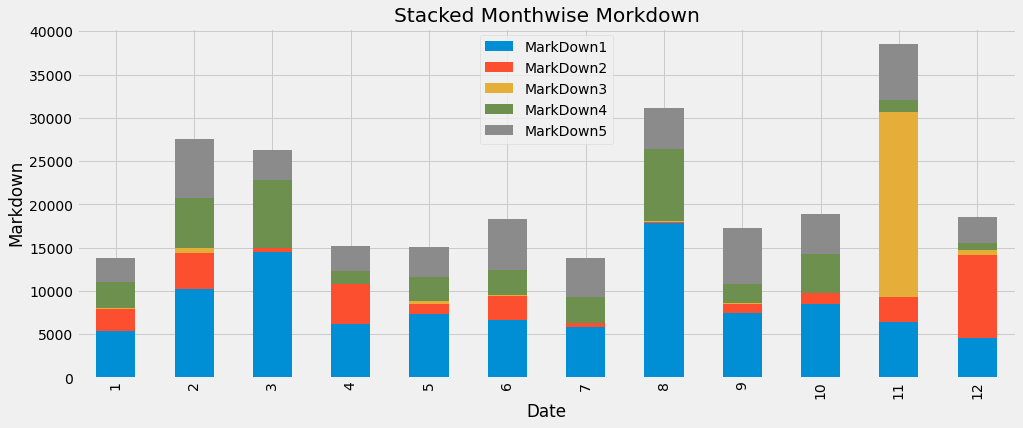

In [20]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Stacked Monthwise Morkdown")
plt.ylabel("Markdown")

Text(0, 0.5, 'Markdown')

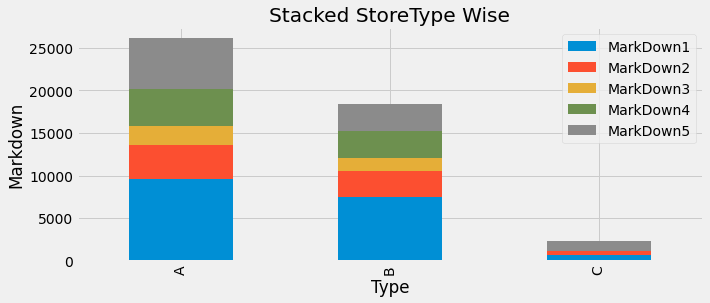

In [21]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Stacked StoreType Wise")
plt.ylabel("Markdown")

# Prediction

In [22]:
#Prediction on Date and Store
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, log_loss

from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [23]:
itt = IterativeImputer()
# imputing the missing value with knn imputer 
df = itt.fit_transform(data_table[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]) 
data_table.MarkDown1 = df[:,0]
data_table.MarkDown2 = df[:,1]
data_table.MarkDown3 = df[:,2]
data_table.MarkDown4 = df[:,3]
data_table.MarkDown5 = df[:,4]
data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})

df = pd.get_dummies(data_table['Type'], drop_first = True)
data_table["B"] = df["B"]
data_table["C"] = df["C"]
data_table.drop(['Type'],axis=1,inplace=True)

data_table["Month"] = data_table.Date.dt.month
data_table["Year"] = data_table.Date.dt.year
data_table["WeekofYear"] = data_table.Date.dt.weekofyear
data_table.drop(['Date'],axis=1,inplace=True)

<ipython-input-23-ef556f09c6e9>:20: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_table["WeekofYear"] = data_table.Date.dt.weekofyear


In [24]:
data_table.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,B,C,Month,Year,WeekofYear
0,1,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,1,164.0,0,0,5,2010,17
1,1,38.51,2.548,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.242170,8.106,0,164.0,0,0,12,2010,48
2,1,39.93,2.514,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.289143,8.106,1,161.0,0,0,2,2010,7
3,1,46.63,2.561,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.319643,8.106,1,140.0,0,0,2,2010,8
4,1,46.50,2.625,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.350143,8.106,1,155.0,0,0,5,2010,18


In [25]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
classifiers = [
    LinearRegression(),
    ElasticNet(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5),
    Lasso(alpha =16, random_state=100),
    ElasticNet(alpha=0.8),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(), 
    LinearSVR(), 
    NuSVR(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
score = []
models = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    #print(type(classifier).__name__)
    #print("model score: %.3f" % classifier.score(X_test, y_test))
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    #score[type(classifier).__name__] = classifier.score(X_test, y_test)

C:\Users\ho.phuongdt\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\ho.phuongdt\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [27]:
df_score = pd.DataFrame(list(zip(name, score, models)),columns=['name','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,score,model
name,,
KernelRidge,-2.780665,"KernelRidge(alpha=0.6, coef0=2.5, kernel='poly..."
LinearSVR,-1.077666,LinearSVR()
SVR,0.075302,SVR()
NuSVR,0.085084,NuSVR()
Lasso,0.178212,"Lasso(alpha=16, random_state=100)"
ElasticNet,0.286083,ElasticNet()
ElasticNet,0.301687,ElasticNet(alpha=0.8)
LinearRegression,0.444299,LinearRegression()
RidgeCV,0.444311,"RidgeCV(alphas=array([0.001, 0.01 , 0.1 , 1. ..."


In [28]:
model = df_score.loc["NuSVR","model"]
data_test.drop(['Weekly_Sales'],axis=1,inplace=True)
predict = model.predict(data_test)
predict

C:\Users\ho.phuongdt\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([ 95.33671857, 128.08688183, 125.66287363, ...,  82.41788839,
        77.97510161,  76.74357259])